In [42]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import datetime as dt
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
#jet = mcm.get_cmap('jet')
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import sys
import os
import psutil
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
from tqdm import tqdm
import dask.array as da
import dask.dataframe as dd
import dask
%matplotlib inline 
import matplotlib.gridspec as gridspec
#import line_profiler
#%load_ext line_profiler

/tmp/ipykernel_3434290/2282274303.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


# WACCM Data Loading

In [43]:

win_Monthfolderstr = 'Dec-Feb'
win_ds_months = ['12','01','02']

spr_Monthfolderstr = 'Mar-May'
spr_ds_months = ['03','04','05']

sum_Monthfolderstr = 'Jun-Aug'
sum_ds_months = ['06','07','08']

aut_Monthfolderstr = 'Sep-Nov'
aut_ds_months = ['09','10','11']


#run_name = 'Jianfei_run'
run_name = 'Wuhu_IonTr_run'
#run_name = 'Wuhu_IonTr_run_No_glbavg'

win_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{win_Monthfolderstr}.nc'
spr_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{spr_Monthfolderstr}.nc'
sum_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{sum_Monthfolderstr}.nc'
aut_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{aut_Monthfolderstr}.nc'

ds_months_ar = np.arange(0,3)   

ds_win = xr.open_dataset(win_file)
ds_spr = xr.open_dataset(spr_file)
ds_sum = xr.open_dataset(sum_file)
ds_aut = xr.open_dataset(aut_file)

ds_sum

<xarray.Dataset>
Dimensions:                    (lev_sl: 19, time: 336, lat: 96, latsl: 36,
                                lon: 144, LT: 48, LT_L: 144, timesl: 2, mth: 3)
Coordinates:
  * lev_sl                     (lev_sl) float64 1.473e-05 1.891e-05 ... 0.001329
  * time                       (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                        (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                      (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                        (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                         (LT) float64 0.0 0.5 1.0 1.5 ... 22.5 23.0 23.5
  * LT_L                       (LT_L) float64 0.0 0.1667 0.3333 ... 23.67 23.83
  * timesl                     (timesl) float64 0.0 1.0
  * mth                        (mth) float64 6.0 7.0 8.0
Data variables: (12/22)
    Zavg_sl                    (lev_sl) float64 ...
    altavg_sl                  (lev_sl) float64 ...
    times_str_min              (mth, timesl) object ...
    times_str_max              (mth, timesl) object ...
    SpEs_Occ_Fr_b_dsavglevLT   (lat) float64 ...
    SpEs_Occ_Fr_b_dsavglev     (lat, LT) float64 ...
    ...                         ...
    SpEsns_Occ_Fr_avg          (lev_sl, lat, lon, mth) float64 ...
    SpEs                       (lev_sl, time, lat, LT_L, timesl, mth) float64 ...
    Mptdens_sh                 (lev_sl, time, lat, LT_L, timesl, mth) float64 ...
    SpEsns                     (lev_sl, time, lat, lon, timesl, mth) float64 ...
    Mptdensns                  (lev_sl, time, lat, lon, timesl, mth) float64 ...
    Mptdens_avv1_b_5d          (lev_sl, latsl, timesl, mth) float64 ...

In [44]:

lev_sl = ds_win.variables['lev_sl']
lat = ds_win.variables['lat']
intlat = ds_win.variables['latsl']
lon = ds_win.variables['lon']
LT = ds_win.variables['LT']

#Zavg_sl = ds_win.variables['Zavg_sl']
times_str_min = ds_win.variables['times_str_min']
times_str_max = ds_win.variables['times_str_max']

#=====================================================================
# # # W I N T E R # # # 
win_SpEs_Occ_Fr_b_dsavglevLT = ds_win.variables['SpEs_Occ_Fr_b_dsavglevLT']   # LAT line plot 
win_SpEsns_Occ_Fr_dsavglev = ds_win.variables['SpEsns_Occ_Fr_dsavglev']       # LAT - LON over all heights
win_SpEs_Occ_Fr_b_dsavglev = ds_win.variables['SpEs_Occ_Fr_b_dsavglev']       # LAT - LT over all heights
win_SpEsns_Occ_Fr_dsavg = ds_win.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height

win_SpEs_Occ_Fr_b_dsavg = ds_win.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
win_alt_sl_sh_avg_b_dsavg = ds_win.variables['alt_sl_sh_avg_b_dsavg']
win_alt_sl_sh_avg_b_dsavgg = win_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

win_SpEs_Occ_Fr_b_dsavgLT = ds_win.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
win_alt_sl_sh_avg_b_dsavgLT = ds_win.variables['alt_sl_sh_avg_b_dsavgLT']
win_alt_sl_sh_avg_b_dsavgLTT = win_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

win_SpEs_Occ_Fr_bb_5d_dsavg = ds_win.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
win_alt_sl_sh_avg_bb_5d_dsavg = ds_win.variables['alt_sl_sh_avg_bb_5d_dsavg']
win_alt_sl_sh_avg_bb_5d_dsavgg = win_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])
                                                                         
#=====================================================================
# # # S P R I N G # # # 
spr_SpEs_Occ_Fr_b_dsavglevLT = ds_spr.variables['SpEs_Occ_Fr_b_dsavglevLT']   # LAT line plot
spr_SpEsns_Occ_Fr_dsavglev = ds_spr.variables['SpEsns_Occ_Fr_dsavglev']       # LAT - LON over all heights
spr_SpEs_Occ_Fr_b_dsavglev = ds_spr.variables['SpEs_Occ_Fr_b_dsavglev']       # LAT - LT over all heights 
spr_SpEsns_Occ_Fr_dsavg = ds_spr.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height 

spr_SpEs_Occ_Fr_b_dsavg = ds_spr.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height
spr_alt_sl_sh_avg_b_dsavg = ds_spr.variables['alt_sl_sh_avg_b_dsavg']
spr_alt_sl_sh_avg_b_dsavgg = spr_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

spr_SpEs_Occ_Fr_b_dsavgLT = ds_spr.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
spr_alt_sl_sh_avg_b_dsavgLT = ds_spr.variables['alt_sl_sh_avg_b_dsavgLT']
spr_alt_sl_sh_avg_b_dsavgLTT = spr_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

spr_SpEs_Occ_Fr_bb_5d_dsavg = ds_spr.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT 
spr_alt_sl_sh_avg_bb_5d_dsavg = ds_spr.variables['alt_sl_sh_avg_bb_5d_dsavg']
spr_alt_sl_sh_avg_bb_5d_dsavgg = spr_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])
                                                                         
#=====================================================================

# sum_SpEs_Occ_Fr_bb_5d_dsavg
# sum_SpEs_Occ_Fr_b_dsavg

# # # S U M M E R # # # 
sum_SpEs_Occ_Fr_b_dsavglevLT = ds_sum.variables['SpEs_Occ_Fr_b_dsavglevLT']   # LAT line plot 
sum_SpEsns_Occ_Fr_dsavglev = ds_sum.variables['SpEsns_Occ_Fr_dsavglev']       # LAT - LON over all heights 
sum_SpEs_Occ_Fr_b_dsavglev = ds_sum.variables['SpEs_Occ_Fr_b_dsavglev']       # LAT - LT over all heights
sum_SpEsns_Occ_Fr_dsavg = ds_sum.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height

sum_SpEs_Occ_Fr_b_dsavg = ds_sum.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
sum_alt_sl_sh_avg_b_dsavg = ds_sum.variables['alt_sl_sh_avg_b_dsavg']
sum_alt_sl_sh_avg_b_dsavgg = sum_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

sum_SpEs_Occ_Fr_b_dsavgLT = ds_sum.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
sum_alt_sl_sh_avg_b_dsavgLT = ds_sum.variables['alt_sl_sh_avg_b_dsavgLT']
sum_alt_sl_sh_avg_b_dsavgLTT = sum_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

sum_SpEs_Occ_Fr_bb_5d_dsavg = ds_sum.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
sum_alt_sl_sh_avg_bb_5d_dsavg = ds_sum.variables['alt_sl_sh_avg_bb_5d_dsavg']
sum_alt_sl_sh_avg_bb_5d_dsavgg = sum_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])
                                  
sum_Mptdens_avv1_b_5d = ds_sum.variables['Mptdens_avv1_b_5d']
#=====================================================================
# # # A U T U M N # # # 
aut_SpEs_Occ_Fr_b_dsavglevLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavglevLT']   # LAT line plot 
aut_SpEsns_Occ_Fr_dsavglev = ds_aut.variables['SpEsns_Occ_Fr_dsavglev']       # LAT - LON over all heights
aut_SpEs_Occ_Fr_b_dsavglev = ds_aut.variables['SpEs_Occ_Fr_b_dsavglev']       # LAT - LT over all heights
aut_SpEsns_Occ_Fr_dsavg = ds_aut.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height

aut_SpEs_Occ_Fr_b_dsavg = ds_aut.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
aut_alt_sl_sh_avg_b_dsavg = ds_aut.variables['alt_sl_sh_avg_b_dsavg']
aut_alt_sl_sh_avg_b_dsavgg = aut_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

aut_SpEs_Occ_Fr_b_dsavgLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
aut_alt_sl_sh_avg_b_dsavgLT = ds_aut.variables['alt_sl_sh_avg_b_dsavgLT']
aut_alt_sl_sh_avg_b_dsavgLTT = aut_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

aut_SpEs_Occ_Fr_bb_5d_dsavg = ds_aut.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
aut_alt_sl_sh_avg_bb_5d_dsavg = ds_aut.variables['alt_sl_sh_avg_bb_5d_dsavg']
aut_alt_sl_sh_avg_bb_5d_dsavgg = aut_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])


# WACCM Magnetic Latitude gridlines for plot

In [45]:
#Define magnetic latitude lines

filename='Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-06.nc' 
ds = xr.open_dataset(filename)
ALATM = ds.variables['ALATM'] #Magnetic latitude at each geographic coordinate
ALat = ds.variables['lat']
ALon = ds.variables['lon']

# Function Altitude Weighted Avg

In [46]:
def wt_avg_alt(input_var, alt):
    """
    Compute weighted average over the altitude dimension of the input variable.

    Parameters:
    - input_var: Input data with dimensions e.g. (altitude, lat, LT) or (altitude, lat, lon).
    - alt: Array of altitudes with same dimensions

    Returns:
    - Weighted average result over the altitude dimension.
    """

    # Check if both input_var and alt have 3 dimensions
    if input_var.ndim != 3 or alt.ndim != 3:
        print("Error: Both input_var and alt should have 3 dimensions in total.")
        return None
    
    alt_shape = input_var.shape[0]
    lat_shape = input_var.shape[1]
    dim3_shape = input_var.shape[2]
    
    dz_tot = 0.
    var_mean_dz_tot = 0.
    
    for i in range(lat_shape):
        for j in range(dim3_shape):
            for z in range(alt_shape-1):
                # Process data for the (altitude, lat, LT) case
                alt2 = alt[z] #Upper altitude
                alt1 = alt[z+1] #Lower altitude
                dz = alt2 - alt1  
                dz_tot += dz

                var2 = input_var[z] #Value at upper level
                var1 = input_var[z+1] #Value at lower level

                #Calculate avg value at interfaces, and multiply by weight
                var_mean_dz = dz*0.5*(var1+var2)
                #Sum up 
                var_mean_dz_tot += var_mean_dz
            #Calculate final mean
            z_wt_mean = var_mean_dz_tot / dz_tot

    return z_wt_mean


# COSMIC Data Loading (David Themens)

In [55]:
# Lat-Lon Whole Dataset
#======================================

output_ds_file = 'Nc_Files/s4max/Daviddata/Ocfr_Daviddata_Whole Dataset.nc'
output_ds = xr.open_dataset(output_ds_file)
latout = output_ds['latitude']
lonout = output_ds['longitude']
ocfr_out = output_ds['ocfr_lon']

In [53]:
# Lat-Lon Seasons Separately
#======================================

output_spr_file = 'Nc_Files/s4max/Daviddata/Ocfr_Daviddata_spring.nc'
output_spr = xr.open_dataset(output_spr_file)
lat_spr = output_spr['latitude']
lon_spr = output_spr['longitude']
ocfr_spr = output_spr['ocfr_lon']

output_sum_file = 'Nc_Files/s4max/Daviddata/Ocfr_Daviddata_summer.nc'
output_sum = xr.open_dataset(output_sum_file)
lat_sum = output_sum['latitude']
lon_sum = output_sum['longitude']
ocfr_sum = output_sum['ocfr_lon']

output_aut_file = 'Nc_Files/s4max/Daviddata/Ocfr_Daviddata_autumn.nc'
output_aut = xr.open_dataset(output_aut_file)
lat_aut = output_aut['latitude']
lon_aut = output_aut['longitude']
ocfr_aut = output_aut['ocfr_lon']

output_win_file = 'Nc_Files/s4max/Daviddata/Ocfr_Daviddata_winter.nc'
output_win = xr.open_dataset(output_win_file)
lat_win = output_win['latitude']
lon_win = output_win['longitude']
ocfr_win = output_win['ocfr_lon']

ocfr_spr_mean = ocfr_spr.mean(dim='longitude')
ocfr_sum_mean = ocfr_sum.mean(dim='longitude')
ocfr_aut_mean = ocfr_aut.mean(dim='longitude')
ocfr_win_mean = ocfr_win.mean(dim='longitude')



# OLD COSMIC Data Loading (David Themens)

In [47]:
cds = xr.open_dataset('Nc_Files/s4max/Daviddata/Ocfr_Daviddata_autumn_5d.nc')
cds

<xarray.Dataset>
Dimensions:    (altitude: 19, latitude: 36, longitude: 72)
Coordinates:
  * altitude   (altitude) float64 128.5 124.4 120.5 117.1 ... 92.29 90.85 89.41
  * latitude   (latitude) float64 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float64 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
Data variables:
    ocfr_lon   (altitude, latitude, longitude) float64 ...
Attributes:
    averaging_period:  Three-Month
    season:            autumn

In [48]:
seasons = ['spring', 'summer', 'autumn', 'winter']
datasets = {}

for season in seasons:
    file_path = f'Nc_Files/s4max/Daviddata/Ocfr_Daviddata_{season}_5d.nc'
    ds = xr.open_dataset(file_path)
    vars = {
        'altitude': 'altitude',
        'latitude': 'latitude',
        'longitude': 'longitude',
        'ocfr_lon': 'ocfr_lon'
    }

    datasets[season] = {key: ds[value] for key, value in vars.items()}
    ds.close()


# Access the data for spring
spring_data = datasets['spring']
spr_alt = spring_data['altitude']
spr_lat = spring_data['latitude']
spr_lon = spring_data['longitude']
spr_ocfr_lon = spring_data['ocfr_lon']   #(19, 36, 72)

# Access the data for summer
summer_data = datasets['summer']
sum_alt = summer_data['altitude']
sum_lat = summer_data['latitude']
sum_lon = summer_data['longitude']
sum_ocfr_lon = summer_data['ocfr_lon']

# Access the data for autumn
autumn_data = datasets['autumn']
aut_alt = autumn_data['altitude']
aut_lat = autumn_data['latitude']
aut_lon = autumn_data['longitude']
aut_ocfr_lon = autumn_data['ocfr_lon']

# Access the data for winter
winter_data = datasets['winter']
win_alt = winter_data['altitude']
win_lat = winter_data['latitude']
win_lon = winter_data['longitude']
win_ocfr_lon = winter_data['ocfr_lon']

In [49]:

#Lat-Lon Plots
reshaped_spr_alt = spr_alt.expand_dims({'dim_1': 1, 'dim_2': 1}).transpose('altitude', 'dim_2', 'dim_1')
reshaped_alt = np.tile(reshaped_spr_alt, (1, spr_ocfr_lon.shape[1], spr_ocfr_lon.shape[2])) # Use broadcasting to create the array with the same dimensions as spr_ocfr_lon_m

spr_ocfr_lon_altmean = wt_avg_alt(spr_ocfr_lon, reshaped_alt)
sum_ocfr_lon_altmean = wt_avg_alt(sum_ocfr_lon, reshaped_alt)
aut_ocfr_lon_altmean = wt_avg_alt(aut_ocfr_lon, reshaped_alt)
win_ocfr_lon_altmean = wt_avg_alt(win_ocfr_lon, reshaped_alt)


# #Lat-LT Plots
# timeplot = np.linspace(0, 24, 49)
# timeconv_plot_ticks = np.arange(0,25, dtype=float)

# reshaped_alt2 = np.tile(reshaped_spr_alt, (1, spr_ocfr_LT.shape[1], spr_ocfr_LT.shape[2])) # Use broadcasting to create the array with the same dimensions as spr_ocfr_LT_m

# spr_ocfr_LT_altmean = wt_avg_alt(spr_ocfr_LT, reshaped_alt2)
# sum_ocfr_LT_altmean = wt_avg_alt(sum_ocfr_LT, reshaped_alt2)
# aut_ocfr_LT_altmean = wt_avg_alt(aut_ocfr_LT, reshaped_alt2)
# win_ocfr_LT_altmean = wt_avg_alt(win_ocfr_LT, reshaped_alt2)


#Lat only
spr_ocfr_LT_lat = spr_ocfr_lon_altmean.mean(dim='longitude')
sum_ocfr_LT_lat = sum_ocfr_lon_altmean.mean(dim='longitude')
aut_ocfr_LT_lat = aut_ocfr_lon_altmean.mean(dim='longitude')
win_ocfr_LT_lat = win_ocfr_lon_altmean.mean(dim='longitude')

#Alt-Lat plots
spr_ocfr_LT_LTmean = spr_ocfr_lon.mean(dim='longitude')
sum_ocfr_LT_LTmean = sum_ocfr_lon.mean(dim='longitude')
aut_ocfr_LT_LTmean = aut_ocfr_lon.mean(dim='longitude')
win_ocfr_LT_LTmean = win_ocfr_lon.mean(dim='longitude')

In [51]:
sum_ocfr_lon

<xarray.DataArray 'ocfr_lon' (altitude: 19, latitude: 36, longitude: 72)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ...,

       [[100.,  nan, ...,  nan,  nan],
        [ nan,  nan, ..., 100., 100.],
        ...,
        [100., 100., ...,  nan, 100.],
        [ nan, 100., ...,  nan, 100.]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan, 100.],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan, 100., ...,  nan,  nan]]])
Coordinates:
  * altitude   (altitude) float64 128.5 124.4 120.5 117.1 ... 92.29 90.85 89.41
  * latitude   (latitude) float64 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float64 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5

In [37]:
# Save plotting variables to nc file

output_file = 'Nc_Files/s4max/Daviddata/Ocfr_Daviddata_plotting.nc'

output_dataset = xr.Dataset(
    data_vars={
        'spr_ocfr_lon_altmean': spr_ocfr_lon_altmean,
        'sum_ocfr_lon_altmean': sum_ocfr_lon_altmean,
        'aut_ocfr_lon_altmean': aut_ocfr_lon_altmean,
        'win_ocfr_lon_altmean': win_ocfr_lon_altmean,
        'spr_ocfr_LT_lat': spr_ocfr_LT_lat,
        'sum_ocfr_LT_lat': sum_ocfr_LT_lat,
        'aut_ocfr_LT_lat': aut_ocfr_LT_lat,
        'win_ocfr_LT_lat': win_ocfr_LT_lat,
        'spr_ocfr_LT_LTmean': spr_ocfr_LT_LTmean,
        'sum_ocfr_LT_LTmean': sum_ocfr_LT_LTmean,
        'aut_ocfr_LT_LTmean': aut_ocfr_LT_LTmean,
        'win_ocfr_LT_LTmean': win_ocfr_LT_LTmean,
    },
    coords={
        'latitude': spr_ocfr_lon.latitude,
        'longitude': spr_ocfr_lon.longitude, 
        'altitude': spr_ocfr_lon.altitude
        
    },
)

output_dataset.to_netcdf(output_file)

# COSMIC Data Loading (old)

In [162]:
s4max_threshold = 0.35

#=================================================================================
spr_filepath = f'Nc_Files/s4max/e_criteria/Ocfr_spring_5d_s4max_{s4max_threshold}.nc'
spr_ds = xr.open_dataset(spr_filepath)

# Extract variables and coordinates to new variables
spr_alt = spr_ds['altitude']
spr_lat = spr_ds['latitude']
spr_lon = spr_ds['longitude']
spr_local_time = spr_ds['local_time']

spr_local_time_plot = spr_local_time.values
spr_local_time_plot[0] = 0.0
spr_local_time_plot[-1] = 24.0

spr_lat_plot = spr_lat.values
spr_lat_plot[0] = -90.
spr_lat_plot[-1] = 90.

spr_ocfr_lon = spr_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT = spr_ds['ocfr_LT'] # dimensions altitude, latitude, local_time

#=================================================================================
sum_filepath = f'Nc_Files/s4max/e_criteria/Ocfr_summer_5d_s4max_{s4max_threshold}.nc'
sum_ds = xr.open_dataset(sum_filepath)
sum_ocfr_lon = sum_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
sum_ocfr_LT = sum_ds['ocfr_LT'] # dimensions altitude, latitude, local_time

#=================================================================================
aut_filepath = f'Nc_Files/s4max/e_criteria/Ocfr_autumn_5d_s4max_{s4max_threshold}.nc'
aut_ds = xr.open_dataset(aut_filepath)
aut_ocfr_lon = aut_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
aut_ocfr_LT = aut_ds['ocfr_LT'] # dimensions altitude, latitude, local_time

#=================================================================================
win_filepath = f'Nc_Files/s4max/e_criteria/Ocfr_winter_5d_s4max_{s4max_threshold}.nc'
win_ds = xr.open_dataset(win_filepath)
win_ocfr_lon = win_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
win_ocfr_LT = win_ds['ocfr_LT'] # dimensions altitude, latitude, local_time



In [163]:
# Averaging for plots


#Lat-Lon Plots
reshaped_spr_alt = spr_alt.expand_dims({'dim_1': 1, 'dim_2': 1}).transpose('altitude', 'dim_2', 'dim_1')
reshaped_alt = np.tile(reshaped_spr_alt, (1, spr_ocfr_lon.shape[1], spr_ocfr_lon.shape[2])) # Use broadcasting to create the array with the same dimensions as spr_ocfr_lon_m

spr_ocfr_lon_altmean = wt_avg_alt(spr_ocfr_lon, reshaped_alt)
sum_ocfr_lon_altmean = wt_avg_alt(sum_ocfr_lon, reshaped_alt)
aut_ocfr_lon_altmean = wt_avg_alt(aut_ocfr_lon, reshaped_alt)
win_ocfr_lon_altmean = wt_avg_alt(win_ocfr_lon, reshaped_alt)


#Lat-LT Plots
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

reshaped_alt2 = np.tile(reshaped_spr_alt, (1, spr_ocfr_LT.shape[1], spr_ocfr_LT.shape[2])) # Use broadcasting to create the array with the same dimensions as spr_ocfr_LT_m

spr_ocfr_LT_altmean = wt_avg_alt(spr_ocfr_LT, reshaped_alt2)
sum_ocfr_LT_altmean = wt_avg_alt(sum_ocfr_LT, reshaped_alt2)
aut_ocfr_LT_altmean = wt_avg_alt(aut_ocfr_LT, reshaped_alt2)
win_ocfr_LT_altmean = wt_avg_alt(win_ocfr_LT, reshaped_alt2)


#Lat only
spr_ocfr_LT_lat = spr_ocfr_LT_altmean.mean(dim='local_time')
sum_ocfr_LT_lat = sum_ocfr_LT_altmean.mean(dim='local_time')
aut_ocfr_LT_lat = aut_ocfr_LT_altmean.mean(dim='local_time')
win_ocfr_LT_lat = win_ocfr_LT_altmean.mean(dim='local_time')

#Alt-Lat plots
spr_ocfr_LT_LTmean = spr_ocfr_LT.mean(dim='local_time')
sum_ocfr_LT_LTmean = sum_ocfr_LT.mean(dim='local_time')
aut_ocfr_LT_LTmean = aut_ocfr_LT.mean(dim='local_time')
win_ocfr_LT_LTmean = win_ocfr_LT.mean(dim='local_time')



In [ ]:

s4max_threshold = 0.35

#=================================================================================
spr_filepath_2007 = f'Nc_Files/s4max/e_criteria/individual_yrs/Ocfr_2007_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2008 = f'Nc_Files/s4max/e_criteria/individual_yrs/Ocfr_2008_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2009 = f'Nc_Files/s4max/e_criteria/individual_yrs/Ocfr_2009_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2010 = f'Nc_Files/s4max/e_criteria/individual_yrs/Ocfr_2010_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2011 = f'Nc_Files/s4max/e_criteria/individual_yrs/Ocfr_2011_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2012 = f'Nc_Files/s4max/e_criteria/individual_yrs/Ocfr_2012_spring_5d_s4max_{s4max_threshold}.nc'
spr_filepath_2013 = f'Nc_Files/s4max/e_criteria/individual_yrs/Ocfr_2013_spring_5d_s4max_{s4max_threshold}.nc'

spr_ds_2007 = xr.open_dataset(spr_filepath_2007)
spr_ds_2008 = xr.open_dataset(spr_filepath_2008)
spr_ds_2009 = xr.open_dataset(spr_filepath_2009)
spr_ds_2010 = xr.open_dataset(spr_filepath_2010)
spr_ds_2011 = xr.open_dataset(spr_filepath_2011)
spr_ds_2012 = xr.open_dataset(spr_filepath_2012)
spr_ds_2013 = xr.open_dataset(spr_filepath_2013)

spr_ocfr_lon_2007 = spr_ds_2007['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2007 = spr_ds_2007['ocfr_LT'] # dimensions altitude, latitude, local_time

spr_ocfr_lon_2008 = spr_ds_2008['ocfr_lon'] 
spr_ocfr_LT_2008 = spr_ds_2008['ocfr_LT']

spr_ocfr_lon_2009 = spr_ds_2009['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2009 = spr_ds_2009['ocfr_LT']

spr_ocfr_lon_2010 = spr_ds_2010['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2010 = spr_ds_2010['ocfr_LT']

spr_ocfr_lon_2011 = spr_ds_2011['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2011 = spr_ds_2011['ocfr_LT']

spr_ocfr_lon_2012 = spr_ds_2012['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2012 = spr_ds_2012['ocfr_LT']

spr_ocfr_lon_2013 = spr_ds_2013['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_2013 = spr_ds_2013['ocfr_LT']
#=================================================================================

In [ ]:
# Averaging for Plots
# NB removed the spaghetti plot of all years as oc fr was consistently decreasing due to decreasing no of measurements, 
# so decided not to use data analysed in separate years

spr_ocfr_LT_altmean_2007 = spr_ocfr_LT_2007.mean(dim='altitude')
spr_ocfr_LT_lat_2007 = spr_ocfr_LT_altmean_2007.mean(dim='local_time') # Lat plots

spr_ocfr_LT_altmean_2008 = spr_ocfr_LT_2008.mean(dim='altitude')
spr_ocfr_LT_lat_2008 = spr_ocfr_LT_altmean_2008.mean(dim='local_time')

spr_ocfr_LT_altmean_2009 = spr_ocfr_LT_2009.mean(dim='altitude')
spr_ocfr_LT_lat_2009 = spr_ocfr_LT_altmean_2009.mean(dim='local_time')

spr_ocfr_LT_altmean_2010 = spr_ocfr_LT_2010.mean(dim='altitude')
spr_ocfr_LT_lat_2010 = spr_ocfr_LT_altmean_2010.mean(dim='local_time')

spr_ocfr_LT_altmean_2011 = spr_ocfr_LT_2011.mean(dim='altitude')
spr_ocfr_LT_lat_2011 = spr_ocfr_LT_altmean_2011.mean(dim='local_time')

spr_ocfr_LT_altmean_2012 = spr_ocfr_LT_2012.mean(dim='altitude')
spr_ocfr_LT_lat_2012 = spr_ocfr_LT_altmean_2012.mean(dim='local_time')

spr_ocfr_LT_altmean_2013 = spr_ocfr_LT_2013.mean(dim='altitude')
spr_ocfr_LT_lat_2013 = spr_ocfr_LT_altmean_2013.mean(dim='local_time')


In [8]:
########## C O S M I C ################

stdevds_spr_path = 'Nc_Files/s4max/individual_yrs/Ocfr_stddev_spring_s4max_0.35.nc'
stdevds_spr_path = xr.open_dataset(stdevds_spr_path)
stdev_ocfr_LT_spr = stdevds_spr_path['std_dev_ocfr_LT_spring']
stdev_ocfr_LT_spr_lat = stdev_ocfr_LT_spr.mean(dim=['altitude','local_time'])

stdevds_sum_path = 'Nc_Files/s4max/individual_yrs/Ocfr_stddev_summer_s4max_0.35.nc'
stdevds_sum_path = xr.open_dataset(stdevds_sum_path)
stdev_ocfr_LT_sum = stdevds_spr_path['std_dev_ocfr_LT_spring']
stdev_ocfr_LT_sum_lat = stdev_ocfr_LT_sum.mean(dim=['altitude','local_time'])

stdevds_aut_path = 'Nc_Files/s4max/individual_yrs/Ocfr_stddev_autumn_s4max_0.35.nc'
stdevds_aut_path = xr.open_dataset(stdevds_aut_path)
stdev_ocfr_LT_aut = stdevds_aut_path['std_dev_ocfr_LT_autumn']
stdev_ocfr_LT_aut_lat = stdev_ocfr_LT_aut.mean(dim=['altitude','local_time'])

stdevds_win_path = 'Nc_Files/s4max/individual_yrs/Ocfr_stddev_winter_s4max_0.35.nc'
stdevds_win_path = xr.open_dataset(stdevds_win_path)
stdev_ocfr_LT_win = stdevds_win_path['std_dev_ocfr_LT_winter']
stdev_ocfr_LT_win_lat = stdev_ocfr_LT_win.mean(dim=['altitude','local_time'])

FileNotFoundError: [Errno 2] No such file or directory: b'/localhome/sestay/jupyter_new/Nc_Files/s4max/COSMIC_individual_yrs/Ocfr_stddev_spring_s4max_0.35.nc'

In [13]:
###########      M A G N E T I C    L A T    &    L O N      #################


s4max_threshold = 0.35

#=================================================================================
spr_filepath_m = f'Nc_Files/s4max/e_criteria/maglat_maglon/Ocfr_m_spring_5d_s4max_{s4max_threshold}.nc'
spr_dsm = xr.open_dataset(spr_filepath_m)

# Extract variables and coordinates to new variables
spr_alt = spr_dsm['altitude']
spr_mlat = spr_dsm['magnetic latitude']
spr_mlon = spr_dsm['magnetic longitude']
spr_local_time = spr_dsm['local_time']

spr_local_time_plot = spr_local_time.values
spr_local_time_plot[0] = 0.0
spr_local_time_plot[-1] = 24.0

spr_mlat_plot = spr_mlat.values
spr_mlat_plot[0] = -90.
spr_mlat_plot[-1] = 90.

spr_ocfr_lon_m = spr_dsm['ocfr_lon_m'] # dimensions altitude, latitude, longitude
spr_ocfr_LT_m = spr_dsm['ocfr_LT_m'] # dimensions altitude, latitude, local_time

#=================================================================================
sum_filepath_m = f'Nc_Files/s4max/e_criteria/maglat_maglon/Ocfr_m_summer_5d_s4max_{s4max_threshold}.nc'
sum_dsm = xr.open_dataset(sum_filepath_m)
sum_ocfr_lon_m = sum_dsm['ocfr_lon_m'] # dimensions altitude, latitude, longitude
sum_ocfr_LT_m = sum_dsm['ocfr_LT_m'] # dimensions altitude, latitude, local_time

#=================================================================================
aut_filepath_m = f'Nc_Files/s4max/e_criteria/maglat_maglon/Ocfr_m_autumn_5d_s4max_{s4max_threshold}.nc'
aut_dsm = xr.open_dataset(aut_filepath_m)
aut_ocfr_lon_m = aut_dsm['ocfr_lon_m'] # dimensions altitude, latitude, longitude
aut_ocfr_LT_m = aut_dsm['ocfr_LT_m'] # dimensions altitude, latitude, local_time

#=================================================================================
win_filepath_m = f'Nc_Files/s4max/e_criteria/maglat_maglon/Ocfr_m_winter_5d_s4max_{s4max_threshold}.nc'
win_dsm = xr.open_dataset(win_filepath_m)
win_ocfr_lon_m = win_dsm['ocfr_lon_m'] # dimensions altitude, latitude, longitude
win_ocfr_LT_m = win_dsm['ocfr_LT_m'] # dimensions altitude, latitude, local_time



In [15]:
# Averaging for Plots


#Lat-Lon Plots
reshaped_spr_alt = spr_alt.expand_dims({'dim_1': 1, 'dim_2': 1}).transpose('altitude', 'dim_2', 'dim_1')
reshaped_alt = np.tile(reshaped_spr_alt, (1, spr_ocfr_lon_m.shape[1], spr_ocfr_lon_m.shape[2])) # Use broadcasting to create the array with the same dimensions as spr_ocfr_lon_m

spr_ocfr_lon_m_altmean = wt_avg_alt(spr_ocfr_lon_m, reshaped_alt)
sum_ocfr_lon_m_altmean = wt_avg_alt(sum_ocfr_lon_m, reshaped_alt)
aut_ocfr_lon_m_altmean = wt_avg_alt(aut_ocfr_lon_m, reshaped_alt)
win_ocfr_lon_m_altmean = wt_avg_alt(win_ocfr_lon_m, reshaped_alt)


#Lat-LT Plots
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

reshaped_alt2 = np.tile(reshaped_spr_alt, (1, spr_ocfr_LT_m.shape[1], spr_ocfr_LT_m.shape[2])) # Use broadcasting to create the array with the same dimensions as spr_ocfr_LT_m

spr_ocfr_LT_m_altmean = wt_avg_alt(spr_ocfr_LT_m, reshaped_alt2)
sum_ocfr_LT_m_altmean = wt_avg_alt(sum_ocfr_LT_m, reshaped_alt2)
aut_ocfr_LT_m_altmean = wt_avg_alt(aut_ocfr_LT_m, reshaped_alt2)
win_ocfr_LT_m_altmean = wt_avg_alt(win_ocfr_LT_m, reshaped_alt2)


#Lat only
spr_ocfr_LT_m_lat = spr_ocfr_LT_m_altmean.mean(dim='local_time')
sum_ocfr_LT_m_lat = sum_ocfr_LT_m_altmean.mean(dim='local_time')
aut_ocfr_LT_m_lat = aut_ocfr_LT_m_altmean.mean(dim='local_time')
win_ocfr_LT_m_lat = win_ocfr_LT_m_altmean.mean(dim='local_time')

#Alt-Lat plots
spr_ocfr_LT_m_LTmean = spr_ocfr_LT_m.mean(dim='local_time')
sum_ocfr_LT_m_LTmean = sum_ocfr_LT_m.mean(dim='local_time')
aut_ocfr_LT_m_LTmean = aut_ocfr_LT_m.mean(dim='local_time')
win_ocfr_LT_m_LTmean = win_ocfr_LT_m.mean(dim='local_time')



# ---------------
# P L O T T I N G
# ---------------

# WACCM Criteria Plot: sum_Mptdens_avv1_b_5d

In [31]:
ind = 26

intlat_sel = intlat[ind]
print(intlat_sel.values)

alt_sel = sum_alt_sl_sh_avg_bb_5d_dsavgg[:,ind]

Mptdens_sel = sum_Mptdens_avv1_b_5d[:,ind,0,0]


42.5


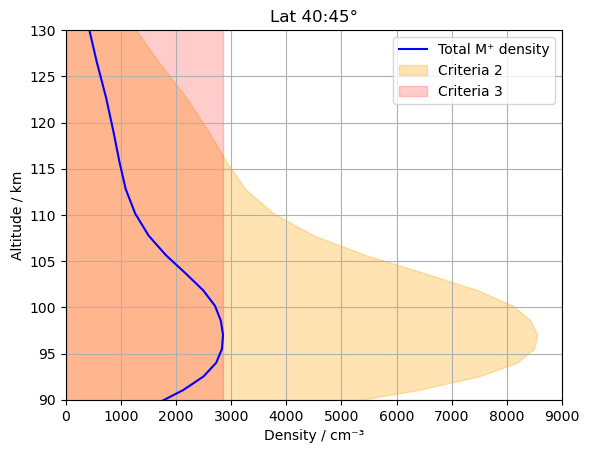

In [53]:
# Plotting Mptdens_sel
plt.plot(Mptdens_sel, alt_sel, label='Total M\u207A density', color='blue')

# Adding a dashed line (3 times Mptdens_sel)
#plt.plot(3 * Mptdens_sel, alt_sel, '--', label='3x Metal density', color='orange')

# Set y-axis limits
plt.ylim(90, 130)

plt.xlim(0, 9000)

# Shading under the line 3 * Mptdens_sel
plt.fill_betweenx(alt_sel, 0, 3 * Mptdens_sel, color='orange', alpha=0.3, label='Criteria 2')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel)

# Add a vertical line at the maximum value
plt.fill_betweenx(alt_sel, 0, max_Mptdens_sel, color='red', alpha=0.2, label='Criteria 3')

plt.xlabel('Density / cm\u207B\u00B3')  
plt.ylabel('Altitude / km')
plt.title(f'Lat {int(intlat_sel.values-2.5)}:{int(intlat_sel.values+2.5)}\u00B0')
plt.legend()
plt.grid(True)


figname = f'{run_name}_Criteria_eg_Lat_{int(intlat_sel.values-2.5)}-{int(intlat_sel.values+2.5)}.png'
plt.savefig('./Figures/Combined/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Lat Line Plots (non magnetic coords)

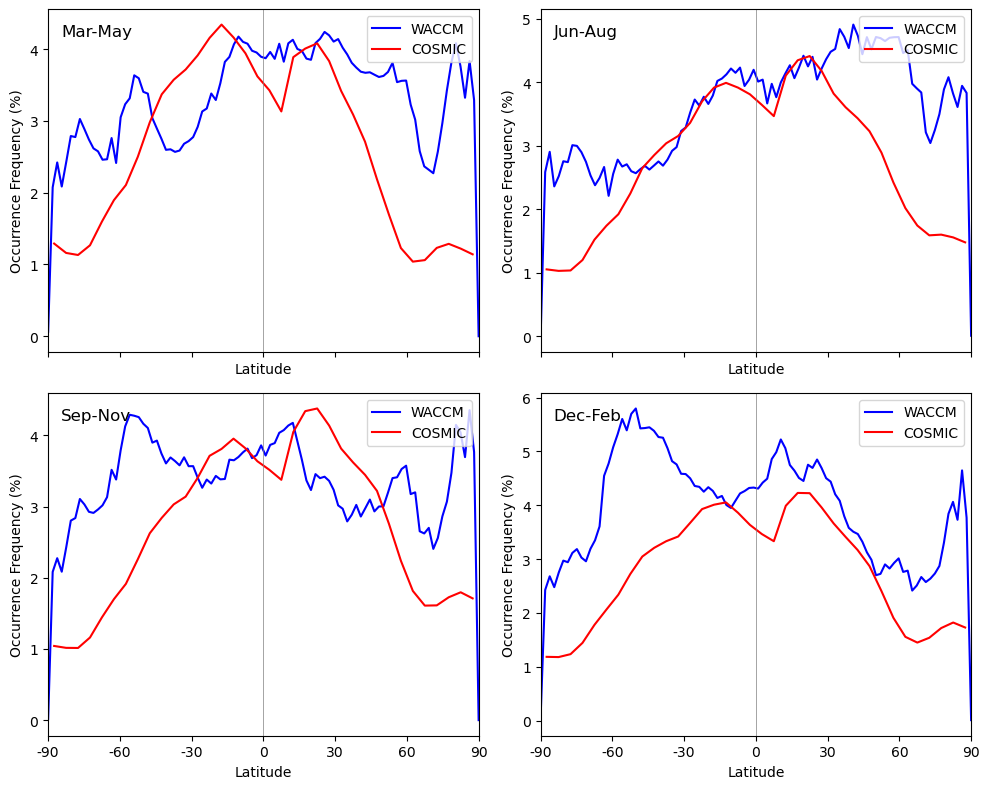

In [57]:
lat_values = np.arange(-90, 95, 5)
lat_bin_edges = lat_values
lat_bin_midpoints = (lat_bin_edges[:-1] + lat_bin_edges[1:]) / 2

factor = 4

# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plot WACCM data
axes[0, 0].plot(lat, spr_SpEs_Occ_Fr_b_dsavglevLT , color='blue', label='WACCM')
axes[0, 1].plot(lat, sum_SpEs_Occ_Fr_b_dsavglevLT , color='blue', label='WACCM')
axes[1, 0].plot(lat, aut_SpEs_Occ_Fr_b_dsavglevLT , color='blue', label='WACCM')
axes[1, 1].plot(lat, win_SpEs_Occ_Fr_b_dsavglevLT , color='blue', label='WACCM')

# Plot COSMIC data with shaded error area
axes[0, 0].plot(lat_spr, ocfr_spr_mean /factor, color='red', label=f'COSMIC')
axes[0, 1].plot(lat_sum, ocfr_sum_mean /factor, color='red', label=f'COSMIC')
axes[1, 0].plot(lat_aut, ocfr_aut_mean /factor, color='red', label=f'COSMIC')
axes[1, 1].plot(lat_win, ocfr_win_mean /factor, color='red', label=f'COSMIC')

# # # Fill between upper and lower bounds of the error
# axes[0, 0].fill_between(lat_bin_midpoints, (spr_ocfr_LT_lat.values - stdev_ocfr_LT_spr_lat.values) / factor, (spr_ocfr_LT_lat.values + stdev_ocfr_LT_spr_lat.values) / factor, color='red', alpha=0.3)
# axes[0, 1].fill_between(lat_bin_midpoints, (sum_ocfr_LT_lat.values - stdev_ocfr_LT_sum_lat.values) / factor, (sum_ocfr_LT_lat.values + stdev_ocfr_LT_sum_lat.values) / factor, color='red', alpha=0.3)
# axes[1, 0].fill_between(lat_bin_midpoints, (aut_ocfr_LT_lat.values - stdev_ocfr_LT_aut_lat.values) / factor, (aut_ocfr_LT_lat.values + stdev_ocfr_LT_aut_lat.values) / factor, color='red', alpha=0.3)
# axes[1, 1].fill_between(lat_bin_midpoints, (win_ocfr_LT_lat.values - stdev_ocfr_LT_win_lat.values) / factor, (win_ocfr_LT_lat.values + stdev_ocfr_LT_win_lat.values) / factor, color='red', alpha=0.3)



# Set common labels and legend
for ax in axes.flatten():
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-90, 90)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Occurrence Frequency (%)')
    ax.set_xticks(np.linspace(-90, 90, 7))
    ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    ax.legend()
    #ax.set_ylim(0, 30)

# Add text annotation to the top left
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        label = ['Mar-May', 'Jun-Aug', 'Sep-Nov','Dec-Feb'][i * 2 + j]
        ax.text(0.03, 0.92, label, transform=ax.transAxes, fontsize=12)

# Move the legend to the top right
axes[0, 0].legend(loc='upper right')
axes[0, 1].legend(loc='upper right')
axes[1, 0].legend(loc='upper right')
axes[1, 1].legend(loc='upper right')
        
# Adjust layout
plt.tight_layout()

# Save and show the figure
#figname = f'{run_name}_Combined_Lat_s4max_{s4max_threshold}_errors.png'
#plt.savefig('./Figures/Combined/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


# Lat - Lon

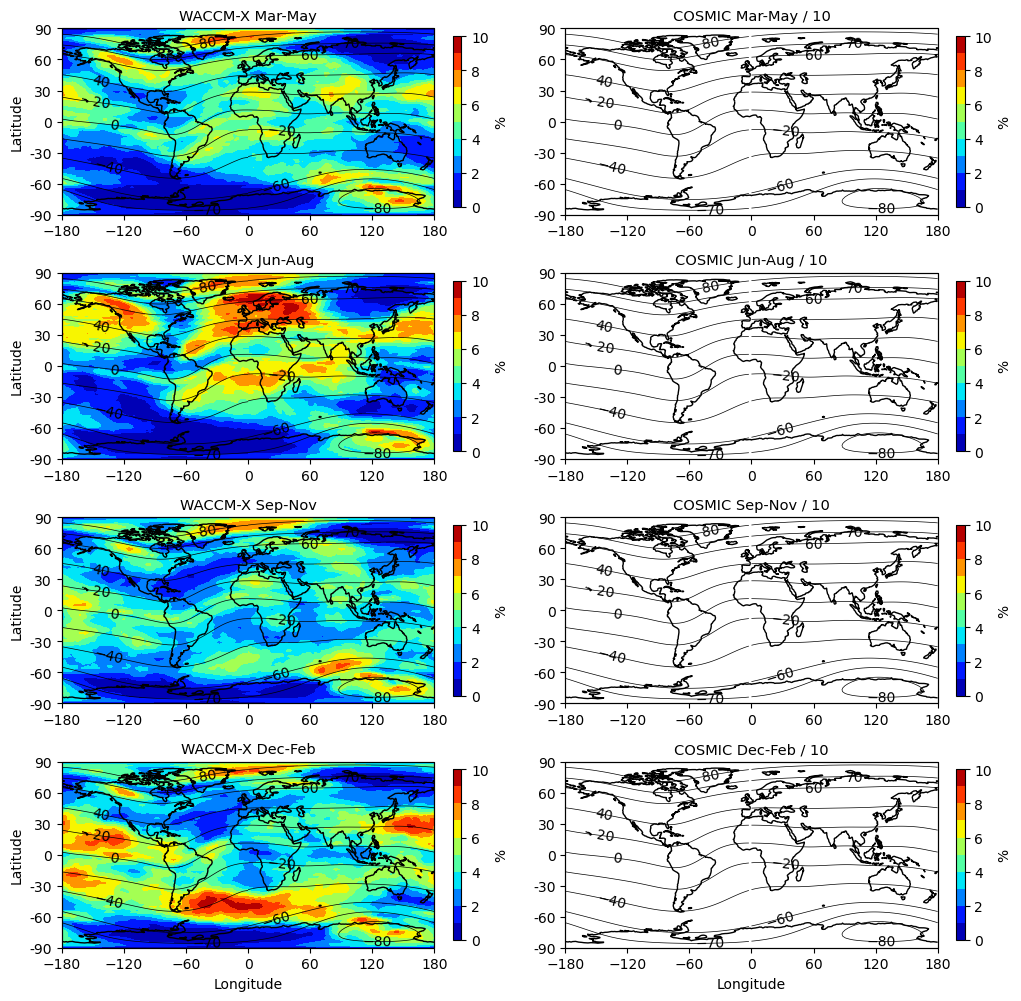

In [41]:
factor = 10


import matplotlib.gridspec as gridspec

#WACCM
# Convert xarray Variable to NumPy array and set last value to 360
lon_plot = lon.values
lon_plot[-1] = 360.


# Create a 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(11, 11),
                         sharex=True, sharey=True, 
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

# Set common colorbar properties
vminc = 0
vmaxc = 10
cmap = plt.get_cmap('jet')


# Plot WACCM data in the first column
subplots_waccm = [spr_SpEsns_Occ_Fr_dsavglev , sum_SpEsns_Occ_Fr_dsavglev
                  , aut_SpEsns_Occ_Fr_dsavglev, win_SpEsns_Occ_Fr_dsavglev]
titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vminw = 0
vmaxw = 10

for i, data in enumerate(subplots_waccm):
    row_waccm = i
    col_waccm = 0
    
    ax_waccm = axes[i, 0]

    C = ax_waccm.contourf(lon_plot, lat, data, cmap=cmap,
                    levels=np.linspace(vminw, vmaxw, 11), vmin=vminw, vmax=vmaxw
                         )

    
    if row_waccm == 3:
        ax_waccm.set_xlabel('Longitude')
    if col_waccm == 0:
        ax_waccm.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
 
    ax_waccm.set_ylabel('Latitude')
    ax_waccm.set_yticks(np.linspace(-90, 90, 7))
    ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        


    
    cbar = fig.colorbar(C, ax=ax_waccm, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 

    ax_waccm.coastlines() 

    #ax.set_title(titles_waccm[i])

    # Add contour lines to each subplot individually
    ax2 = fig.add_subplot(axes[i, 0].get_subplotspec(), projection=ccrs.PlateCarree())

    ax2.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2.contour(lon, lat, ALATM[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels,# vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )

    ax2.patch.set_facecolor('none')
    clabels = ax2.clabel(contour, inline=True, fontsize=10)
    ax2.set_title(f'WACCM-X {titles_waccm[i]}', fontsize=10.5)



spr_lon_plot = spr_lon.values
spr_lon_plot[0] = -180.
spr_lon_plot[-1] = 180.

# Plot COSMIC data in the second column
subplots_cosmic = [spr_ocfr_lon_altmean, sum_ocfr_lon_altmean, aut_ocfr_lon_altmean, win_ocfr_lon_altmean]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data in enumerate(subplots_cosmic):
    ax_cosmic = axes[i, 1]
    

    C = ax_cosmic.contourf(spr_lon, spr_lat, data, cmap=cmap,
                    levels=np.linspace(vminc, vmaxc, 11), vmin=vminc, vmax=vmaxc
                   )

    ax_cosmic.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    if i == 3:
        ax_cosmic.set_xlabel('Longitude')
    #if i == 0:
    ax_cosmic.set_yticks(np.linspace(-90, 90, 7))


    cbar = fig.colorbar(C, ax=ax_cosmic, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 

    ax_cosmic.coastlines() 

    #ax.set_title(titles_cosmic[i])

    # Add contour lines to each subplot individually
    ax2_cosmic = fig.add_subplot(axes[i, 1].get_subplotspec(), projection=ccrs.PlateCarree())

    ax2_cosmic.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2_cosmic.contour(ALon, ALat, ALATM[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels, vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )

    ax2_cosmic.patch.set_facecolor('none')
    clabels = ax2_cosmic.clabel(contour, inline=True, fontsize=10)
    ax2_cosmic.set_title(f'COSMIC {titles_cosmic[i]} / {factor}', fontsize=10.5)




plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
#figname = f'{run_name}_Combined_Lat_vs_Lon_s4max_{s4max_threshold}_e-crit.png'
#plt.savefig('./Figures/Combined/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Lat - LT - all levs

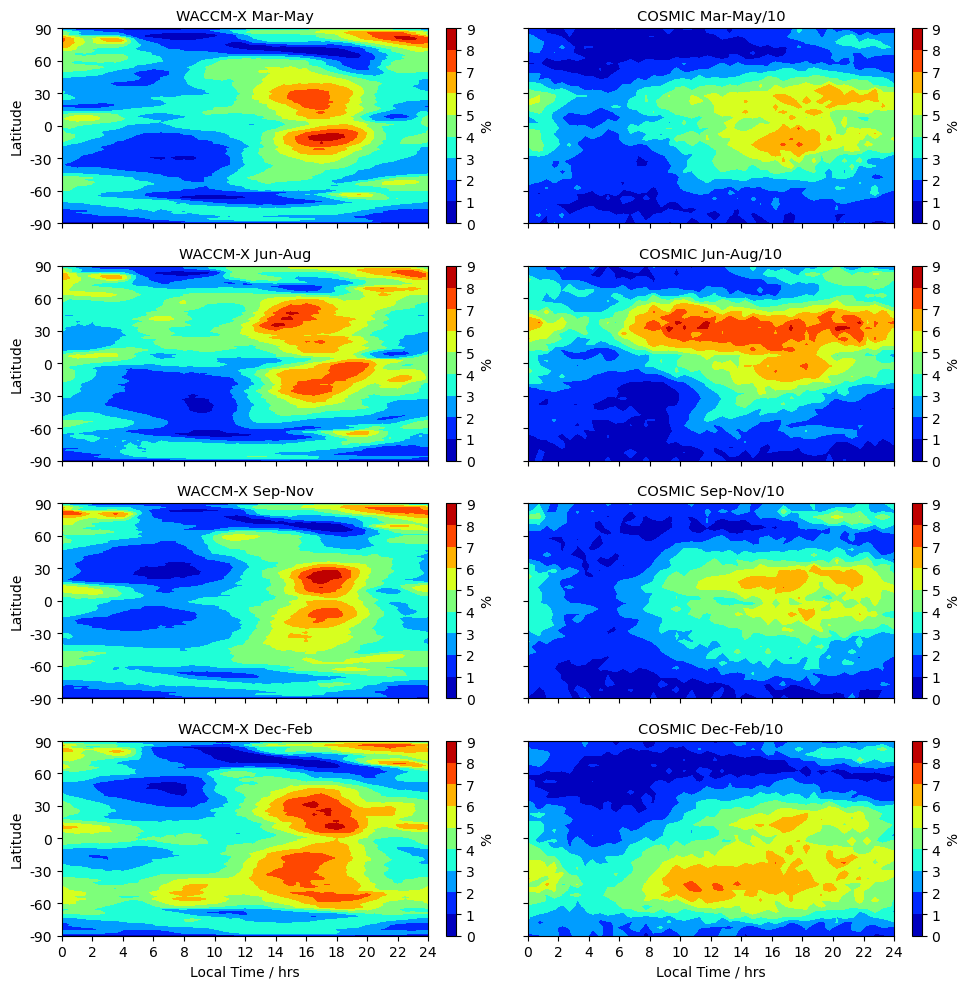

In [106]:
# Lat - LT - all levs

 #Whole Dataset avg over all heights (96, 48) lat,LT
win_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((win_SpEs_Occ_Fr_b_dsavglev, win_SpEs_Occ_Fr_b_dsavglev[:, :1]), axis=1)
spr_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((spr_SpEs_Occ_Fr_b_dsavglev, spr_SpEs_Occ_Fr_b_dsavglev[:, :1]), axis=1)
sum_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((sum_SpEs_Occ_Fr_b_dsavglev, sum_SpEs_Occ_Fr_b_dsavglev[:, :1]), axis=1)
aut_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((aut_SpEs_Occ_Fr_b_dsavglev, aut_SpEs_Occ_Fr_b_dsavglev[:, :1]), axis=1)


# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=4, ncols=2, figsize=(10, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 9
nolevs_cosmic = (vmax_cosmic - vmin_cosmic ) +1
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 9
nolevs_waccm = (vmax_waccm - vmin_waccm ) +1
cmap_waccm = plt.get_cmap('jet')



# WACCM Latitude - Local Time Plots
subplots_waccm = [spr_SpEs_Occ_Fr_b_dsavglev_plote, sum_SpEs_Occ_Fr_b_dsavglev_plote,
                  aut_SpEs_Occ_Fr_b_dsavglev_plote, win_SpEs_Occ_Fr_b_dsavglev_plote]
titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']


for i, data_waccm in enumerate(subplots_waccm):
    row_waccm = i
    col_waccm = 0
    ax_waccm = axes_combined[row_waccm, col_waccm]

    C_waccm = ax_waccm.contourf(timeplot, lat, data_waccm, cmap=jet,
                                levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),
                                vmin=vmin_waccm, vmax=vmax_waccm
                               )

    if row_waccm == 3:
        ax_waccm.set_xlabel('Local Time / hrs')
    if col_waccm == 0:
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))  
    
    ax_waccm.set_ylabel('Latitude')
    ax_waccm.set_yticks(np.linspace(-90, 90, 7))
    ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        
    ax_waccm.set_title(f'WACCM-X {titles_waccm[i]}', fontsize=10.5)


    cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)#, shrink=0.8)
    cbar_waccm.set_label(r'%')

    #ax_waccm.set_title(titles_waccm[i])
    



# COSMIC Latitude - Local Time Plots
subplots_cosmic = [spr_ocfr_LT_altmean/factor, sum_ocfr_LT_altmean/factor, aut_ocfr_LT_altmean/factor, win_ocfr_LT_altmean/factor]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cosmic in enumerate(subplots_cosmic):
    row_cosmic = i
    col_cosmic = 1
    ax_cosmic = axes_combined[row_cosmic, col_cosmic]

    C_cosmic = ax_cosmic.contourf(spr_local_time_plot, spr_lat, data_cosmic, cmap=jet,
                                  levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic),
                                  vmin=vmin_cosmic, vmax=vmax_cosmic)

    if col_cosmic == 0:
        ax_cosmic.set_ylabel('Latitude')
    ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
    ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))   
    
    if row_cosmic == 3:
        ax_cosmic.set_xlabel('Local Time / hrs')
    xticks_cosmic = np.linspace(0, 24, 13)
    ax_cosmic.set_xticks(xticks_cosmic)
    ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
    
    ax_cosmic.set_title(f'COSMIC {titles_waccm[i]}/10', fontsize=10.5)

    cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)#, shrink=0.8)
    cbar_cosmic.set_label(r'%')

    #ax_cosmic.set_title(titles_cosmic[i])


    

plt.tight_layout()#rect=[0.05, 0.03, 1, 0.95])

# Save the combined figure
figname_combined = f'{run_name}_Combined_Lat_vs_LT_s4max_{s4max_threshold}_e-crit.png'
#plt.savefig('./Figures/Combined/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()


# Lat - LT - specific alt - SUMMER AND WINTER

In [54]:
# sum_alt_sl_sh_avg_b_dsavgg
# array([130.6996528 , 126.31135037, 122.32652888, 118.72761791,
#        _115.49491992, 112.60442562, 110.02604948, 107.72294501,
#        _105.65265291, 103.77011753, 102.03131189, 100.39670148,
#         98.83349132,  97.31633256,  95.82640877,  _94.35094978,
#         92.88219541,  91.41604296,  89.95105466])

# win_alt_sl_sh_avg_b_dsavgg
# array([130.67038932, 126.30587116, 122.3556495 , 118.8004359 ,
#        _115.61832158, 112.78231209, 110.25858628, 108.00653125,
#        105.98088084, _104.13528572, 102.42567825, 100.8131432 ,
#         99.26582884,  97.75930836,  96.2753741 ,  _94.80159225,
#         93.33045527,  91.85812647,  90.38342396])

In [55]:
# print(cos_alt)
# <xarray.DataArray 'altitude' (altitude: 19)>
# array([128.506561, 124.369999, 120.528341, 117.068014, _113.968962, 111.206144,
#        108.747799, 106.555252, _104.584795, 102.791067, 101.130657,  99.565104,
#         98.062822,  96.599449,  _95.157055,  93.723246,  92.290184,  90.853384,
#         89.412354])

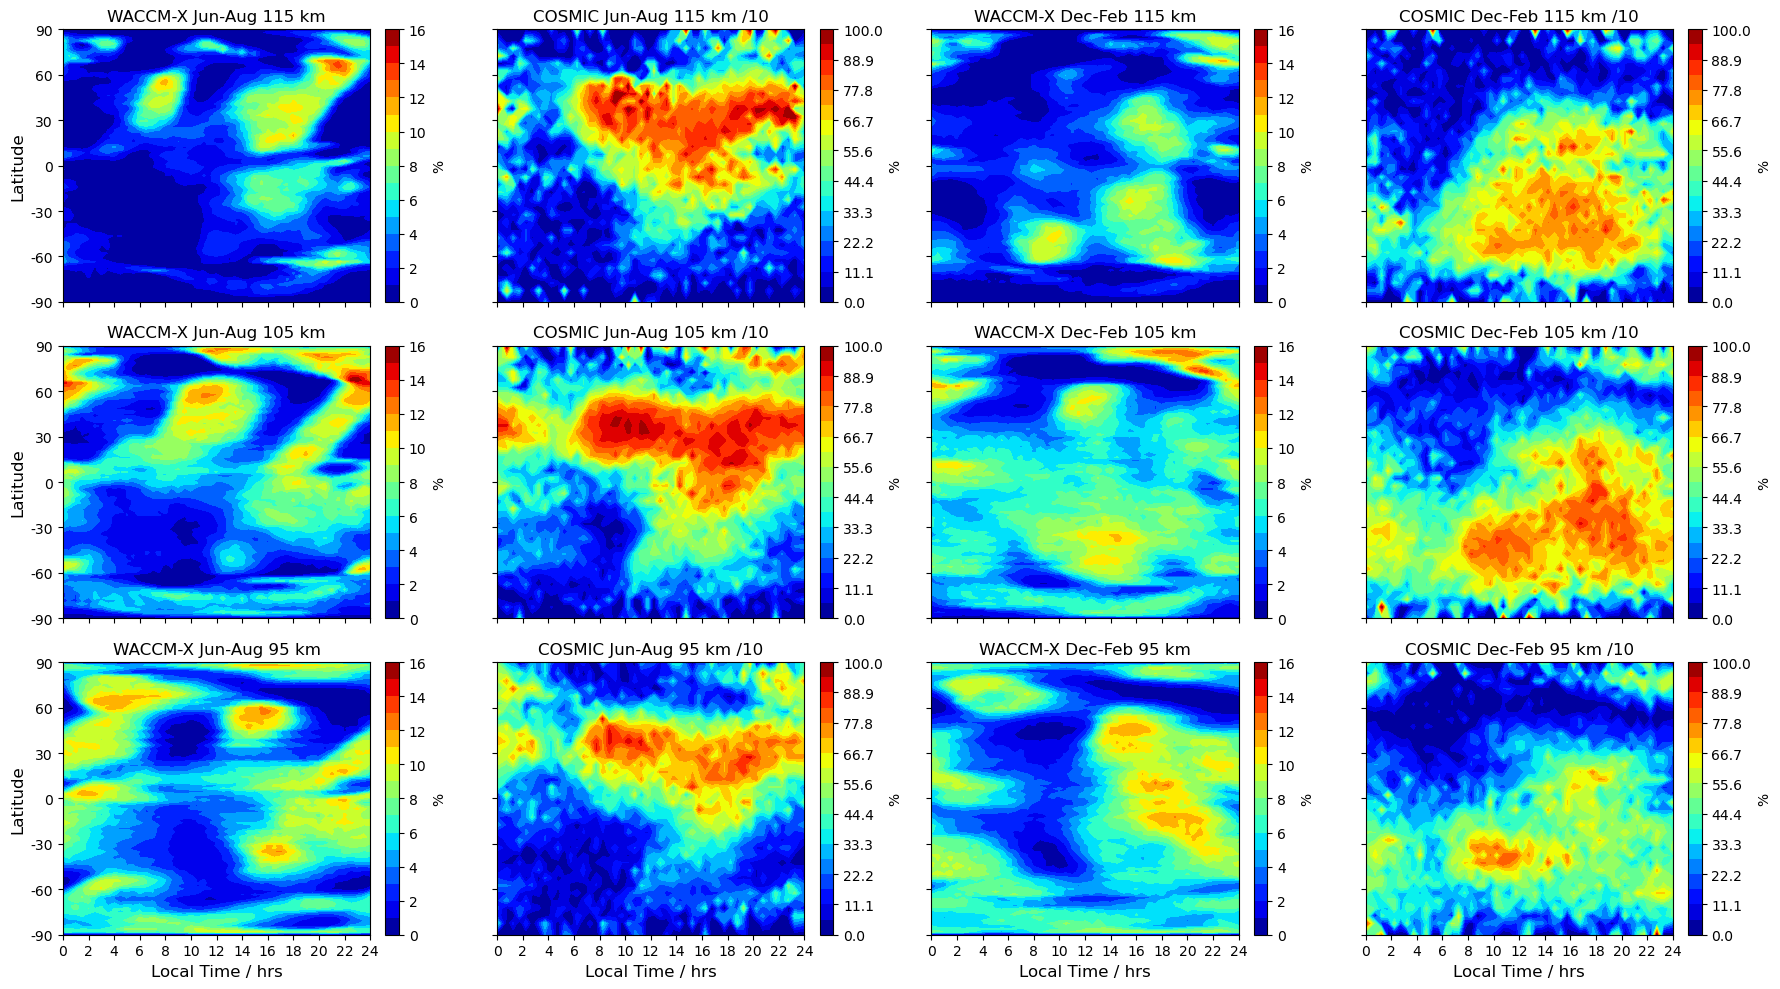

In [119]:
#WACCM
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
winindices = np.argmin(np.abs(win_alt_sl_sh_avg_b_dsavgg.values - np.array(plot_alts)[:, None]), axis=1)
sumindices = np.argmin(np.abs(sum_alt_sl_sh_avg_b_dsavgg.values - np.array(plot_alts)[:, None]), axis=1)

#COSMIC
cos_alt = win_ocfr_LT['altitude']
cos_ind = np.argmin(np.abs(cos_alt.values - np.array(plot_alts)[:, None]), axis=1)


# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 100
nolevs_cosmic = 19 #(vmax_cosmic - vmin_cosmic )+ 1 
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 16
nolevs_waccm = (vmax_waccm - vmin_waccm )+ 1 
cmap_waccm = plt.get_cmap('jet')

# Iterate over altitudes
for i, ialt in enumerate(plot_alts):
    altindex = winindices[i]
    win_SpEs_Occ_Fr_b_dsavg_plot = win_SpEs_Occ_Fr_b_dsavg[altindex, :, :]
    win_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((win_SpEs_Occ_Fr_b_dsavg_plot, win_SpEs_Occ_Fr_b_dsavg_plot[:, :1]),
                                                    axis=1)
    altindex = sumindices[i]
    sum_SpEs_Occ_Fr_b_dsavg_plot = sum_SpEs_Occ_Fr_b_dsavg[altindex, :, :]
    sum_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((sum_SpEs_Occ_Fr_b_dsavg_plot, sum_SpEs_Occ_Fr_b_dsavg_plot[:, :1]),
                                                    axis=1)

    # WACCM Latitude - Local Time Plots
    subplots_waccm = [sum_SpEs_Occ_Fr_b_dsavg_plote, win_SpEs_Occ_Fr_b_dsavg_plote]
    titles_waccm = ['Jun-Aug', 'Dec-Feb']
    titl = 'sum-win'

    cosaltindex = cos_ind[i]

    for j, data_waccm in enumerate(subplots_waccm):
        row_waccm = i
        col_waccm = j * 2  # Adjust column index
        ax_waccm = axes_combined[row_waccm, col_waccm]

        C_waccm = ax_waccm.contourf(timeplot, lat, data_waccm, cmap=cmap_waccm,
                                    levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),
                                    vmin=vmin_waccm, vmax=vmax_waccm)

        # Set labels and ticks
        if row_waccm == 2:
            ax_waccm.set_xlabel('Local Time / hrs',fontsize=12)
        if col_waccm == 0:
            ax_waccm.set_ylabel('Latitude',fontsize=12)
            ax_waccm.set_yticks(np.linspace(-90, 90, 7))
            ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))
        ax_waccm.set_title(f'WACCM-X {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)
        cbar_waccm.set_label(r'%')
        

        
    # COSMIC Latitude - Local Time Plots
    sum_ocfr_LT_plot = sum_ocfr_LT[cosaltindex,:,:]
    win_ocfr_LT_plot = win_ocfr_LT[cosaltindex,:,:]
    
    subplots_cosmic = [sum_ocfr_LT_plot, win_ocfr_LT_plot]
    titles_cosmic = ['Jun-Aug', 'Dec-Feb']

    for j, data_cosmic in enumerate(subplots_cosmic):
        row_cosmic = i
        col_cosmic = j * 2 + 1  # Adjust column index
        ax_cosmic = axes_combined[row_cosmic, col_cosmic]

        C_cosmic = ax_cosmic.contourf(spr_local_time_plot, spr_lat, data_cosmic, cmap=cmap_cosmic,
                                      levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic),
                                      vmin=vmin_cosmic, vmax=vmax_cosmic)

        # Set labels and ticks
        if col_cosmic == 1:
            #ax_cosmic.set_ylabel('Latitude')
            ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
            ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        if row_cosmic == 2:
            ax_cosmic.set_xlabel('Local Time / hrs',fontsize=12)
        xticks_cosmic = np.linspace(0, 24, 13)
        ax_cosmic.set_xticks(xticks_cosmic)
        ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
        ax_cosmic.set_title(f'COSMIC {titles_waccm[j]} {plot_alts[i]} km /10')
        
        # Create individual colorbar for each subplot
        cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)
        cbar_cosmic.set_label(r'%')






plt.tight_layout()

# Save the combined figure
figname_combined = f'{run_name}_Combined_Lat_vs_LT_{titl}_s4max_{s4max_threshold}_e-crit.png'
#plt.savefig('./Figures/Combined/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()


# Lat - LT - specific alt - SPRING AND AUTUMN

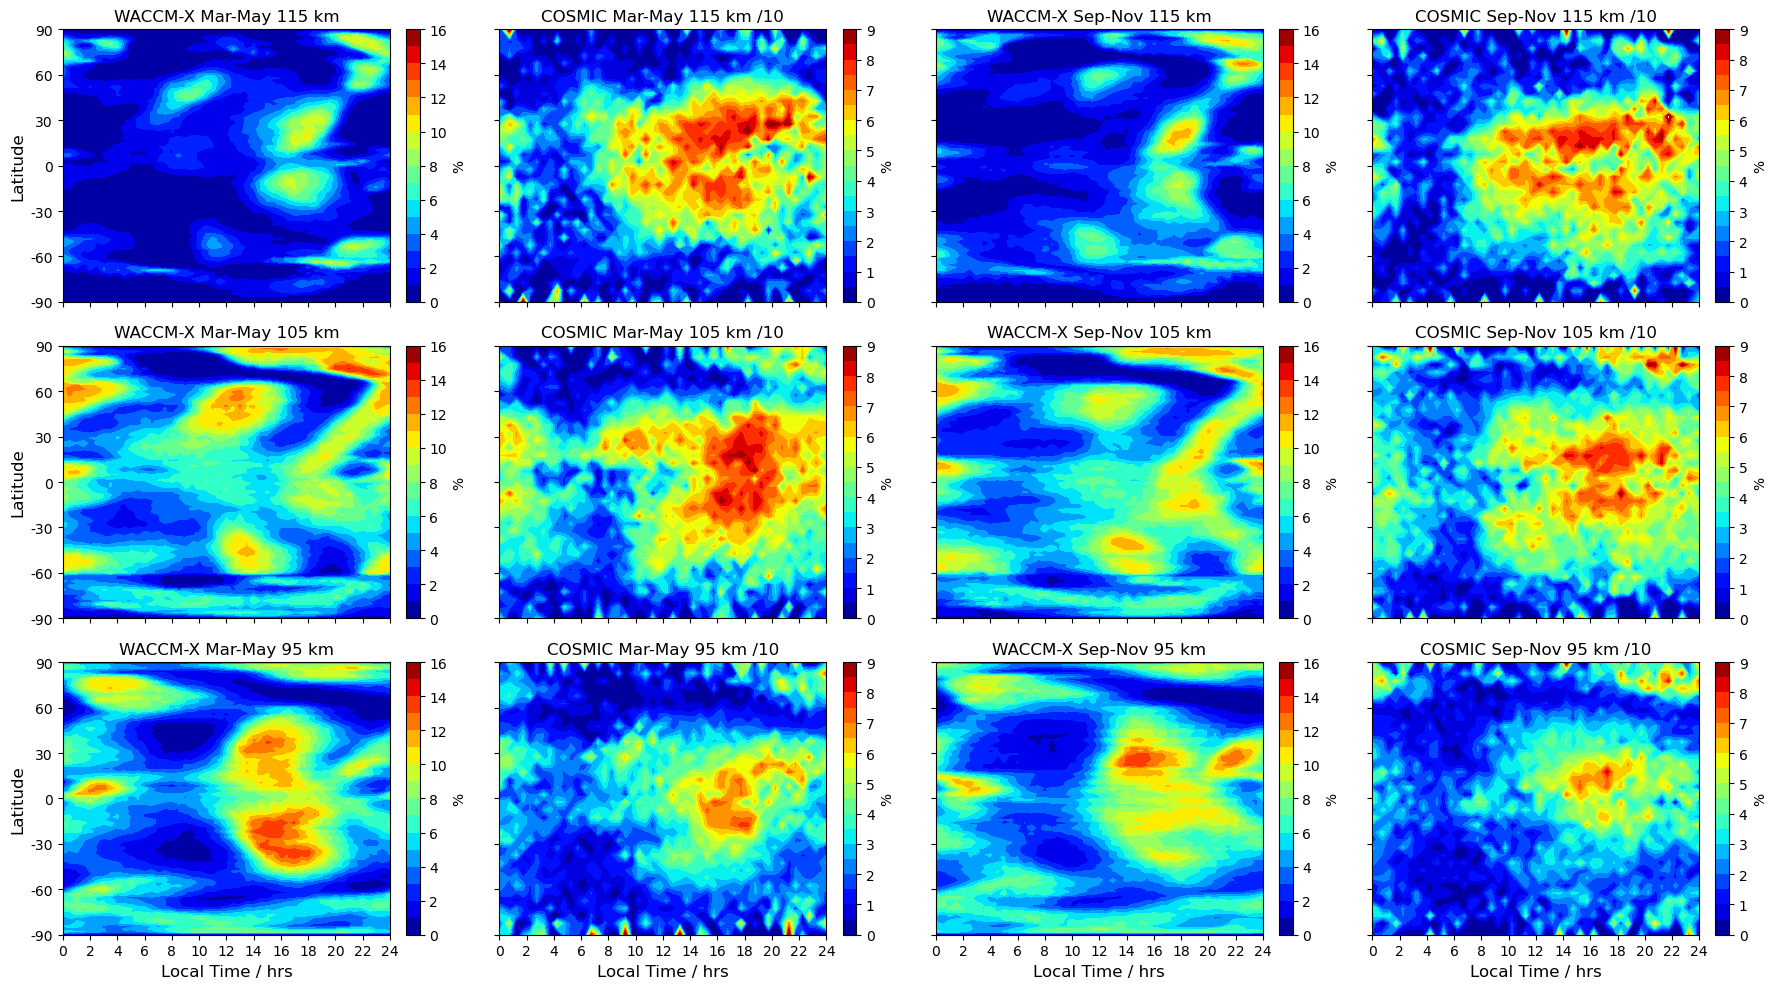

In [108]:
factor = 10

#WACCM
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
autindices = np.argmin(np.abs(aut_alt_sl_sh_avg_b_dsavgg.values - np.array(plot_alts)[:, None]), axis=1)
sprindices = np.argmin(np.abs(spr_alt_sl_sh_avg_b_dsavgg.values - np.array(plot_alts)[:, None]), axis=1)

#COSMIC
cos_alt = win_ocfr_LT['altitude']
cos_ind = np.argmin(np.abs(cos_alt.values - np.array(plot_alts)[:, None]), axis=1)


# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18,10),    #16, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 9
nolevs_cosmic = 19 #(vmax_cosmic - vmin_cosmic )+ 1
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 16
nolevs_waccm = 17 #(vmax_waccm - vmin_waccm )+ 1 
cmap_waccm = plt.get_cmap('jet')

# Iterate over altitudes
for i, ialt in enumerate(plot_alts):
    altindex = sprindices[i]
    spr_SpEs_Occ_Fr_b_dsavg_plot = spr_SpEs_Occ_Fr_b_dsavg[altindex, :, :]
    spr_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((spr_SpEs_Occ_Fr_b_dsavg_plot, spr_SpEs_Occ_Fr_b_dsavg_plot[:, :1]),
                                                    axis=1)
    altindex = autindices[i]
    aut_SpEs_Occ_Fr_b_dsavg_plot = aut_SpEs_Occ_Fr_b_dsavg[altindex, :, :]
    aut_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((aut_SpEs_Occ_Fr_b_dsavg_plot, aut_SpEs_Occ_Fr_b_dsavg_plot[:, :1]),
                                                    axis=1)

    # WACCM Latitude - Local Time Plots
    subplots_waccm = [spr_SpEs_Occ_Fr_b_dsavg_plote, aut_SpEs_Occ_Fr_b_dsavg_plote]
    titles_waccm = ['Mar-May', 'Sep-Nov']
    titl = 'spr-aut'

    cosaltindex = cos_ind[i]

    for j, data_waccm in enumerate(subplots_waccm):
        row_waccm = i
        col_waccm = j * 2  # Adjust column index
        ax_waccm = axes_combined[row_waccm, col_waccm]

        C_waccm = ax_waccm.contourf(timeplot, lat, data_waccm, cmap=cmap_waccm,
                                    levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),
                                    vmin=vmin_waccm, vmax=vmax_waccm
                                   #,extend='max'
                                   )

        # Set labels and ticks
        if row_waccm == 2:
            ax_waccm.set_xlabel('Local Time / hrs',fontsize=12)
        if col_waccm == 0:
            ax_waccm.set_ylabel('Latitude',fontsize=12)
            ax_waccm.set_yticks(np.linspace(-90, 90, 7))
            ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))
        ax_waccm.set_title(f'WACCM-X {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)
        cbar_waccm.set_label(r'%')
        

    # COSMIC Latitude - Local Time Plots
    spr_ocfr_LT_plot = spr_ocfr_LT[cosaltindex,:,:]
    aut_ocfr_LT_plot = aut_ocfr_LT[cosaltindex,:,:] 
    
    # COSMIC Latitude - Local Time Plots
    subplots_cosmic = [spr_ocfr_LT_plot, aut_ocfr_LT_plot]
    titles_cosmic = ['Mar-May', 'Sep-Nov']

    for j, data_cosmic in enumerate(subplots_cosmic):
        row_cosmic = i
        col_cosmic = j * 2 + 1  # Adjust column index
        ax_cosmic = axes_combined[row_cosmic, col_cosmic]

        C_cosmic = ax_cosmic.contourf(spr_local_time_plot, spr_lat, data_cosmic/factor, cmap=cmap_cosmic,
                                      levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic),
                                      vmin=vmin_cosmic, vmax=vmax_cosmic)

        # Set labels and ticks
        if col_cosmic == 1:
            #ax_cosmic.set_ylabel('Latitude')
            ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
            ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        if row_cosmic == 2:
            ax_cosmic.set_xlabel('Local Time / hrs',fontsize=12)
        xticks_cosmic = np.linspace(0, 24, 13)
        ax_cosmic.set_xticks(xticks_cosmic)
        ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
        ax_cosmic.set_title(f'COSMIC {titles_waccm[j]} {plot_alts[i]} km /10')
        
        # Create individual colorbar for each subplot
        cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)
        cbar_cosmic.set_label(r'%')






plt.tight_layout()

# Save the combined figure
figname_combined = f'{run_name}_Combined_Lat_vs_LT_{titl}_s4max_{s4max_threshold}_e-crit.png'
#plt.savefig('./Figures/Combined/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()


# Alt - Lat

In [79]:
# spr_alt_sl_sh_avg_b_dsavgLTT[-1] #91.21950658
# sum_alt_sl_sh_avg_b_dsavgLTT[-1] #89.95105466
# aut_alt_sl_sh_avg_b_dsavgLTT[-1] #91.22601507
# win_alt_sl_sh_avg_b_dsavgLTT[-1] #90.38342396

# spr_alt_sl_sh_avg_b_dsavgLTT[0] #131.26019841
# sum_alt_sl_sh_avg_b_dsavgLTT[0] #130.6996528
# aut_alt_sl_sh_avg_b_dsavgLTT[0] #131.92889679
# win_alt_sl_sh_avg_b_dsavgLTT[0] #130.67038932

# spr_alt[0] #128.50656128
# spr_alt[-1] #89.41235352

<xarray.DataArray 'altitude' ()>
array(89.41235352)
Coordinates:
    altitude  float64 89.41

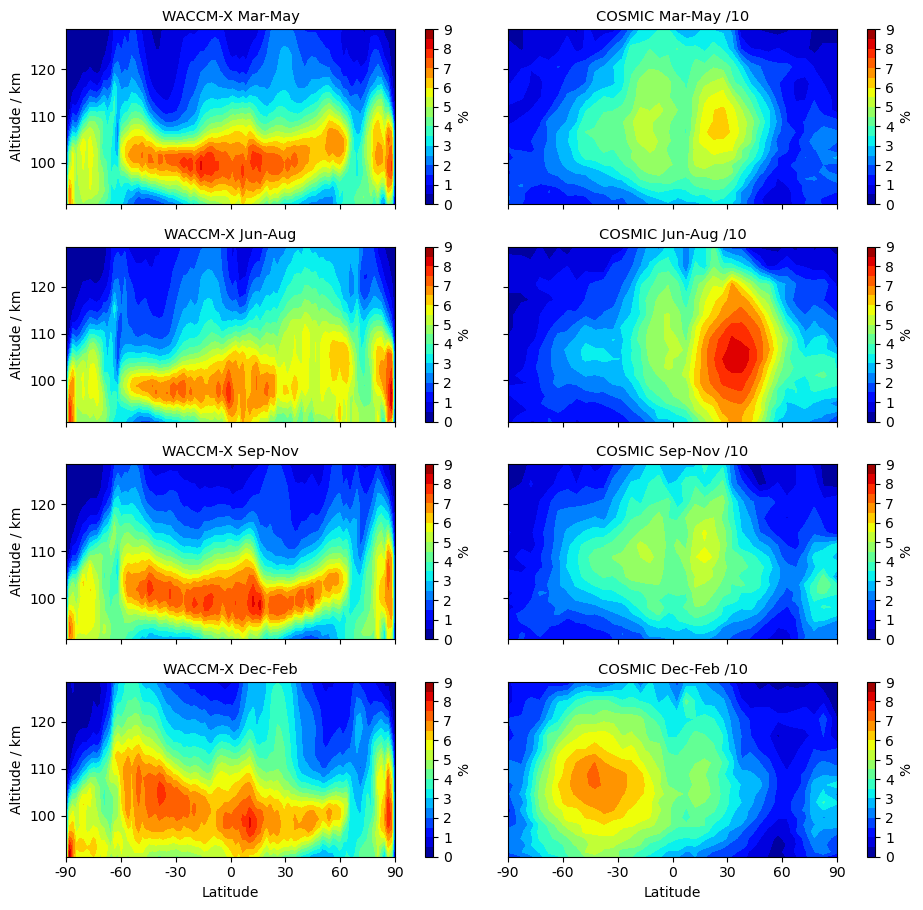

In [109]:

import matplotlib.pyplot as plt
import numpy as np

# Define common parameters
vmin_cosmic = 0
vmax_cosmic = 9
nolevs_cosmic = 19 #(vmax_cosmic - vmin_cosmic )+ 1

vmin_waccm = 0
vmax_waccm = 9
nolevs_waccm = 19 #(vmax_waccm - vmin_waccm )+ 1 

cmap = plt.get_cmap('jet')

# Create a 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=True)

# Plot WACCM data on the left
subplots_waccm = [spr_SpEs_Occ_Fr_b_dsavgLT , sum_SpEs_Occ_Fr_b_dsavgLT 
                  , aut_SpEs_Occ_Fr_b_dsavgLT , win_SpEs_Occ_Fr_b_dsavgLT ]

alts_waccm = [spr_alt_sl_sh_avg_b_dsavgLTT, sum_alt_sl_sh_avg_b_dsavgLTT
              , aut_alt_sl_sh_avg_b_dsavgLTT, win_alt_sl_sh_avg_b_dsavgLTT ]


titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_waccm in enumerate(subplots_waccm):
    ax = axes[i, 0]

    alts_plot = alts_waccm[i]
    
    C = ax.contourf(lat, alts_plot, data_waccm, cmap=cmap, levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),
                    vmin=vmin_waccm, vmax=vmax_waccm
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate WACCM plots

    ax.set_ylabel('Altitude / km')

    #ax.set_ylim(alts_plot.min(), alts_plot.max())

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'%')

    ax.set_title(f'WACCM-X {titles_waccm[i]}', fontsize=10.5)
    
    
# Plot COSMIC data on the right
subplots_cosmic = [spr_ocfr_LT_LTmean/factor, sum_ocfr_LT_LTmean/factor, aut_ocfr_LT_LTmean/factor, win_ocfr_LT_LTmean/factor]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cosmic in enumerate(subplots_cosmic):
    ax = axes[i, 1]

    C = ax.contourf(spr_lat_plot, spr_alt, data_cosmic, cmap=cmap,
                    levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic), vmin=vmin_cosmic, vmax=vmax_cosmic)

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate COSMIC plots

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'%')

    ax.set_title(f'COSMIC {titles_cosmic[i]} /10', fontsize=10.5)
    
ax.set_ylim(spr_alt_sl_sh_avg_b_dsavgLTT[-1], spr_alt[0])

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
figname = f'{run_name}_Combined_Alt_vs_Lat_s4max_{s4max_threshold}.png'
#plt.savefig('./Figures/Combined/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Alt - LT

In [112]:
spr_ocfr_LT #19,36,48

<xarray.DataArray 'ocfr_LT' (altitude: 19, latitude: 36, local_time: 48)>
array([[[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ]],

       [[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      , 25.      , ...,  0.      ,  0.      ],
        ...,
        [66.666667,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ]],

       ...,

       [[50.      , 11.111111, ...,  0.      , 33.333333],
        [27.272727, 25.      , ..., 14.285714,  0.      ],
        ...,
        [10.526316, 16.666667, ...,  0.      ,  0.      ],
        [40.      , 20.      , ...,  0.      ,  0.      ]],

       [[ 0.      , 50.      , ..., 50.      , 66.666667],
        [11.111111, 18.181818, ..., 25.      , 21.428571],
        ...,
        [ 0.      , 16.666667, ..., 56.25    , 10.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ]]])
Coordinates:
  * altitude    (altitude) float64 128.5 124.4 120.5 117.1 ... 92.29 90.85 89.41
  * latitude    (latitude) float64 -90.0 -82.5 -77.5 -72.5 ... 77.5 82.5 90.0
  * local_time  (local_time) float64 0.0 0.75 1.25 1.75 ... 22.75 23.25 24.0

In [130]:
spr_alt_sl_sh_avg_bb_5d_dsavgg.shape #19,36

spr_alt_sl_sh_avg_bb_5d_dsavgg

<xarray.Variable (lev_sl: 19, latsl: 36)>
array([[130.66040833, 130.72191998, 130.81038409, 130.92065703,
        131.03481826, 131.11755951, 131.17670769, 131.22446997,
        131.26425418, 131.30350791, 131.33808529, 131.36141772,
        131.37508773, 131.38054998, 131.37673198, 131.36456947,
        131.35099483, 131.34064942, 131.33749965, 131.34165077,
        131.35625431, 131.37548942, 131.39472258, 131.40426697,
        131.39795653, 131.38805302, 131.37526597, 131.35818681,
        131.35457649, 131.37172624, 131.39622015, 131.41015309,
        131.38593344, 131.32700482, 131.22703315, 131.16490026],
       [126.3269184 , 126.38307718, 126.45856794, 126.56526903,
        126.68546416, 126.76809857, 126.8280302 , 126.87987887,
        126.9220678 , 126.96145678, 126.99349197, 127.01369386,
        127.02488176, 127.02807819, 127.02206269, 127.00868002,
        126.9953433 , 126.98558503, 126.9820435 , 126.98517717,
        126.99952122, 127.01947211, 127.03989773, 127.04992651,
        127.04339653, 127.03317526, 127.01964709, 126.99978593,
        126.99035981, 126.99824723, 127.0122598 , 127.02702533,
        127.01177041, 126.9532384 , 126.86515451, 126.80282434],
       [122.40702257, 122.45567443, 122.51799282, 122.62125871,
        122.747811  , 122.83255292, 122.89376377, 122.95036206,
...
         93.99625603,  93.96910811,  93.95105605,  93.95087269,
         93.96461242,  93.98807627,  94.03323208,  94.0681709 ],
       [ 92.65001945,  92.67610706,  92.69879707,  92.73441517,
         92.7641455 ,  92.76344311,  92.76893284,  92.79071037,
         92.81288936,  92.83039999,  92.83805176,  92.83138647,
         92.81318235,  92.79148523,  92.77550239,  92.7762162 ,
         92.80302638,  92.8347019 ,  92.83353188,  92.80538507,
         92.77868491,  92.76370252,  92.75549652,  92.7416336 ,
         92.70741675,  92.66797075,  92.62960426,  92.57809838,
         92.53540788,  92.50932945,  92.49276183,  92.4958298 ,
         92.51316978,  92.54005403,  92.58883676,  92.62441197],
       [ 91.14645062,  91.17355548,  91.19506281,  91.2311268 ,
         91.2609827 ,  91.2597141 ,  91.26562228,  91.28962037,
         91.31234338,  91.329904  ,  91.33904673,  91.33487443,
         91.31773852,  91.29603047,  91.27980173,  91.2793625 ,
         91.30314779,  91.3314983 ,  91.33065646,  91.30448452,
         91.28008917,  91.26799898,  91.26352737,  91.25467974,
         91.22554912,  91.19064868,  91.15588991,  91.1064141 ,
         91.0653709 ,  91.03964195,  91.02470242,  91.03136066,
         91.05205246,  91.08267685,  91.13448021,  91.16988373]])

In [134]:
intlat

<xarray.IndexVariable 'latsl' (latsl: 36)>
array([-87.5, -82.5, -77.5, -72.5, -67.5, -62.5, -57.5, -52.5, -47.5, -42.5,
       -37.5, -32.5, -27.5, -22.5, -17.5, -12.5,  -7.5,  -2.5,   2.5,   7.5,
        12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,  47.5,  52.5,  57.5,
        62.5,  67.5,  72.5,  77.5,  82.5,  87.5])

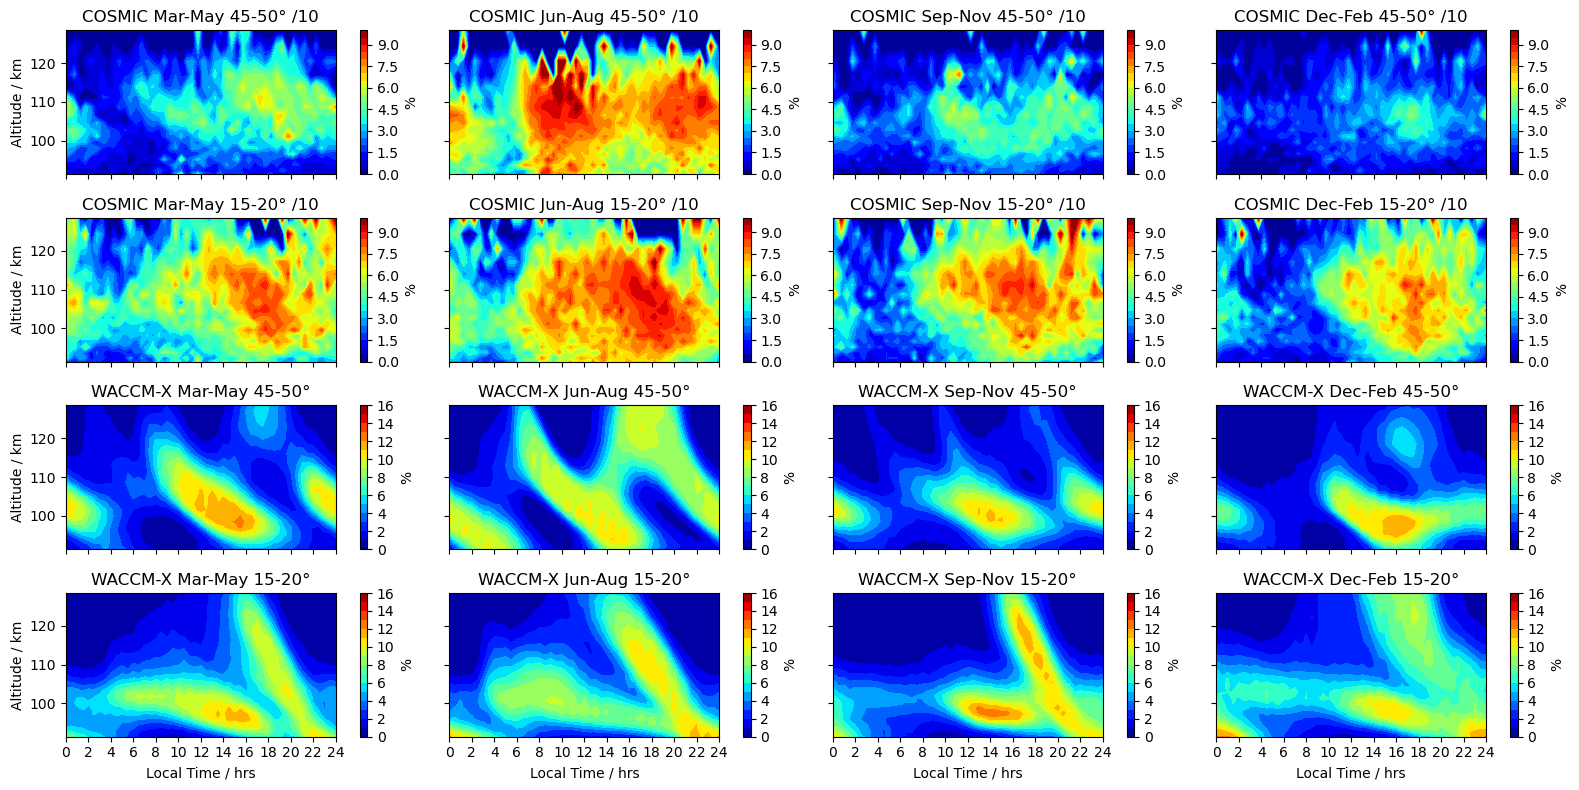

In [166]:

###------------------------### C O S M I C ###------------------------###

#Alt-LT plots, individual Lat slices

# Define the latitude slices
#latitude_slices = [(10, 15), (20, 25), (30, 35), (40, 45), (50, 55)]
latitude_slices = [(15, 20) , (45, 50) ]
lenlat = len(latitude_slices)

# # Calculate the number of latitude slices
# nlatsl = len(latitude_slices)
# # Extract min and max values from the latitude slices
# latslmin = min(min(lat_min, lat_max) for lat_min, lat_max in latitude_slices)
# latslmax = max(max(lat_min, lat_max) for lat_min, lat_max in latitude_slices)


# Create new variables for each season and latitude slice
spr_ocfr_LT_latsl = {}
sum_ocfr_LT_latsl = {}
aut_ocfr_LT_latsl = {}
win_ocfr_LT_latsl = {}

# Loop through each latitude slice
for lat_slice in latitude_slices:
    lower_lat, upper_lat = lat_slice
    
    # Slice the data for the current latitude slice
    spr_slice = spr_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    sum_slice = sum_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    aut_slice = aut_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    win_slice = win_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    
    # Calculate the mean along the 'latitude' dimension
    spr_latslmean = spr_slice.mean(dim='latitude')
    sum_latslmean = sum_slice.mean(dim='latitude')
    aut_latslmean = aut_slice.mean(dim='latitude')
    win_latslmean = win_slice.mean(dim='latitude')
    
    # Store the results in dictionaries
    spr_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = spr_latslmean
    sum_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = sum_latslmean
    aut_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = aut_latslmean
    win_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = win_latslmean

###------------------------### W A C C M ###------------------------###
ind_latsls = {}
plot_lowaltlim = 0.

for lat_slice in latitude_slices:
    lower_lat, upper_lat = lat_slice
    
    # Store the results in dictionaries
    ind_latsls[f'{lower_lat}-{upper_lat}'] = np.where((intlat >= lower_lat) & (intlat <= upper_lat))[0][0]

    

###------------------------### W A C C M ###------------------------###


# Define the seasons and titles
seasons = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']
lenseas = len(seasons)

#set common colorbar properties
vmin_waccm = 0
vmax_waccm = 16
nolevs_waccm = 17

vmin_cosmic = 0
vmax_cosmic = 10
nolevs_cosmic = 21
cmap = plt.get_cmap('jet')


# Create a 4x4 subplot grid
fig, axes = plt.subplots(nrows=lenlat*2, ncols=lenseas, figsize=( (4*lenseas), (4*lenlat) ), sharex=True, sharey=True)


#################################### COSMIC PLOTS ######################################   
for i_season, season in enumerate(seasons):
    for i_lat_band, (lower_lat, upper_lat) in enumerate(latitude_slices[::-1]):
        
        if i_lat_band < lenlat:
            # Extract data for the top rows
            if season.lower() == 'mar-may':
                data = spr_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']
            elif season.lower() == 'jun-aug':
                data = sum_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']
            elif season.lower() == 'sep-nov':
                data = aut_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']
            elif season.lower() == 'dec-feb':
                data = win_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']

        # Create subplots for each season and latitude band
        ax = axes[i_lat_band, i_season]

        if i_lat_band < lenlat: 
            contour = ax.contourf(spr_local_time_plot, spr_alt, data/factor, cmap='jet',
                                  levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic),
                                  vmin=vmin_cosmic, vmax=vmax_cosmic)

        cbar = fig.colorbar(contour, ax=ax, pad=0.07)
        cbar.set_label(r'%')
        ax.set_title(f'COSMIC {season} {lower_lat}-{upper_lat}\u00b0 /10')
        
        if i_season == 0:
            ax.set_ylabel('Altitude / km')
            
#################################### WACCM PLOTS ######################################            
for i_season, season in enumerate(seasons):
    for i_lat_band, (lower_lat, upper_lat) in enumerate(latitude_slices[::-1]):
        
        i_lat_ind = i_lat_band + lenlat
        
        intlat_ind = np.where((intlat >= lower_lat) & (intlat <= upper_lat))[0]
        
        if i_lat_ind > (lenlat-1):
            if season.lower() == 'mar-may':
                data_waccm = spr_SpEs_Occ_Fr_bb_5d_dsavg[:, intlat_ind, :]
                data_waccm = np.squeeze(data_waccm)
                datac_waccm = np.concatenate((data_waccm, data_waccm[:, :1]), axis=1)
                plot_alt = spr_alt_sl_sh_avg_bb_5d_dsavgg[ :, ind_latsls[f'{lower_lat}-{upper_lat}'] ]
            elif season.lower() == 'jun-aug':
                data_waccm = sum_SpEs_Occ_Fr_bb_5d_dsavg[:, intlat_ind, :]
                data_waccm = np.squeeze(data_waccm)
                datac_waccm = np.concatenate((data_waccm, data_waccm[:, :1]), axis=1)
                plot_alt = sum_alt_sl_sh_avg_bb_5d_dsavgg[ :, ind_latsls[f'{lower_lat}-{upper_lat}'] ]
            elif season.lower() == 'sep-nov':
                data_waccm = aut_SpEs_Occ_Fr_bb_5d_dsavg[:, intlat_ind, :]
                data_waccm = np.squeeze(data_waccm)
                datac_waccm = np.concatenate((data_waccm, data_waccm[:, :1]), axis=1)
                plot_alt = aut_alt_sl_sh_avg_bb_5d_dsavgg[ :, ind_latsls[f'{lower_lat}-{upper_lat}'] ]
                plot_lowaltlim = plot_alt[-1]
            elif season.lower() == 'dec-feb':
                data_waccm = win_SpEs_Occ_Fr_bb_5d_dsavg[:, intlat_ind, :]
                data_waccm = np.squeeze(data_waccm)
                datac_waccm = np.concatenate((data_waccm, data_waccm[:, :1]), axis=1)
                plot_alt = win_alt_sl_sh_avg_bb_5d_dsavgg[ :, ind_latsls[f'{lower_lat}-{upper_lat}'] ]
  
        ax = axes[i_lat_ind, i_season]

        #if i_lat_ind > 1:
        contour = ax.contourf(timeplot, plot_alt, datac_waccm, cmap=cmap, 
                              levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), #extend='max', 
                              vmin=vmin_waccm, vmax=vmax_waccm)
            
               
                
        if i_lat_band == 1:
            ax.set_xlabel('Local Time / hrs')
        xticks = np.linspace(0, 24, 13)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks.astype(int))
        ax.set_title(f'WACCM-X {season} {lower_lat}-{upper_lat}\u00b0')

        cbar = fig.colorbar(contour, ax=ax, pad=0.07)
        cbar.set_label(r'%')
        
        ax.set_ylim(plot_lowaltlim, spr_alt.max())
        
        if i_season == 0:
            ax.set_ylabel('Altitude / km')
    
#################################### WACCM PLOTS ######################################

plt.tight_layout()

# Save the figure
figname = f'{run_name}_Combined_Alt_vs_LT_s4max_{s4max_threshold}.png'
#plt.savefig('./Figures/Combined/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

In [ ]:
sum_Mptdens_avv1_b_5d